In [16]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk("C:/Users/Noel/Desktop/Data Science/ML Study/Bagging"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Noel/Desktop/Data Science/ML Study/Bagging\Bagging_learning_tool.ipynb
C:/Users/Noel/Desktop/Data Science/ML Study/Bagging\Iris.csv
C:/Users/Noel/Desktop/Data Science/ML Study/Bagging\.ipynb_checkpoints\Bagging_learning_tool-checkpoint.ipynb


In [25]:
df = pd.read_csv('Iris.csv')

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df = df.iloc[:,1:]

In [28]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder = LabelEncoder()

In [31]:
df['Species'] = encoder.fit_transform(df['Species'])

In [32]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [35]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

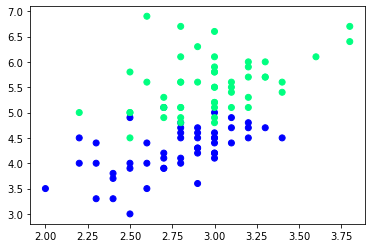

In [37]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [38]:
df_train = df.iloc[:60,].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
79,2.6,3.5,1
65,3.1,4.4,1
70,3.2,4.8,1
96,2.9,4.2,1
81,2.4,3.7,1
100,3.3,6.0,2
74,2.9,4.3,1
57,2.4,3.3,1
52,3.1,4.9,1


In [39]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [40]:
df_train

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
92,2.6,4.0,1
124,3.3,5.7,2
108,2.5,5.8,2
97,2.9,4.3,1
103,2.9,5.6,2
133,2.8,5.1,2
62,2.2,4.0,1
145,3.0,5.2,2
123,2.7,4.9,2


In [41]:
df_val

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
146,2.5,5.0,2
113,2.5,5.0,2
63,2.9,4.7,1
68,2.2,4.5,1


In [42]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
143,3.2,5.9,2
114,2.8,5.1,2
122,2.8,6.7,2
85,3.4,4.5,1


In [45]:
X_test = df_val.iloc[:,0:2].values
y_test = df_test.iloc[:,-1].values

In [46]:
y_test

array([2, 2, 2, 2, 1])

## Case 1 - Bagging

In [47]:
# data for Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
62,2.2,4.0,1
55,2.8,4.5,1
123,2.7,4.9,2
108,2.5,5.8,2
133,2.8,5.1,2
103,2.9,5.6,2
108,2.5,5.8,2


In [52]:
# pip install mlxtend

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [53]:
dt_bag1 = DecisionTreeClassifier()

In [56]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

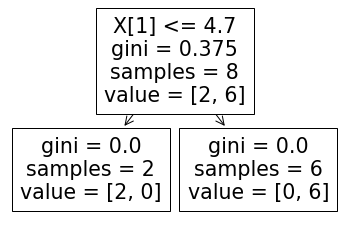

0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


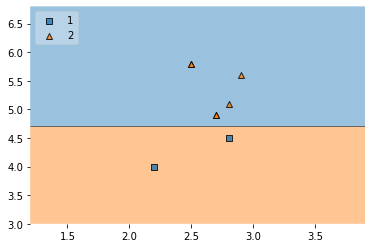

In [58]:
evaluate(dt_bag1,X,y)

In [60]:
# data for tree 1
df_bag = df_train.sample(8,replace=True)

#Fetch X and y
X - df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
124,3.3,5.7,2
108,2.5,5.8,2
55,2.8,4.5,1
124,3.3,5.7,2
97,2.9,4.3,1
97,2.9,4.3,1
145,3.0,5.2,2


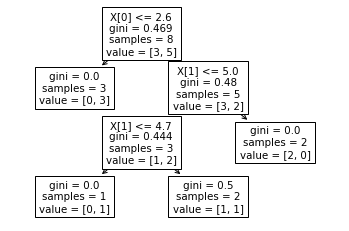

0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


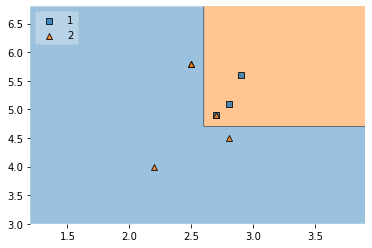

In [63]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [96]:
# data for tree 1
df_bag = df_train.sample(8,replace=True)

#Fetch X and y
X - df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
97,2.9,4.3,1
108,2.5,5.8,2
145,3.0,5.2,2
103,2.9,5.6,2
133,2.8,5.1,2
92,2.6,4.0,1
92,2.6,4.0,1


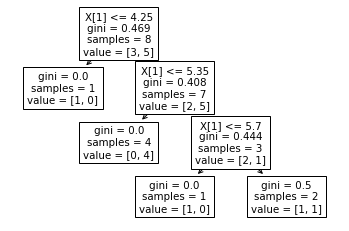

0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


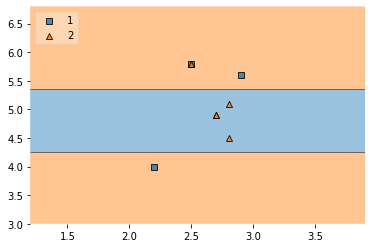

In [97]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [98]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
143,3.2,5.9,2
114,2.8,5.1,2
122,2.8,6.7,2
85,3.4,4.5,1


In [103]:
print('Predictor 1',dt_bag1.predict(np.array([3.5,4.5]).reshape(1,2)))
print('Predictor 2',dt_bag1.predict(np.array([3.5,4.5]).reshape(1,2)))
print('Predictor 3',dt_bag1.predict(np.array([3.5,4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [104]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
92,2.6,4.0,1
124,3.3,5.7,2
108,2.5,5.8,2
97,2.9,4.3,1
103,2.9,5.6,2
133,2.8,5.1,2
62,2.2,4.0,1
145,3.0,5.2,2
123,2.7,4.9,2


In [105]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
123,2.7,4.9,2
124,3.3,5.7,2
55,2.8,4.5,1
103,2.9,5.6,2
97,2.9,4.3,1
108,2.5,5.8,2
145,3.0,5.2,2


## Random Subspaces

In [106]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [107]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,113,6.8,3.0,5.5,2.1,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [108]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,113,6.8,3.0,5.5,2.1,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [113]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
143,6.8,144
130,7.4,131
130,7.4,131
130,7.4,131
27,5.2,28
112,6.8,113
130,7.4,131
36,5.5,37
